In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
#from 10.actv11
Hawaii_measurements = Base.classes.measurement
Hawaii_stations = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
# from 10.2.2 Student Sunny Hours
session = Session(bind=engine) 
session

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.


('2017-08-23',)

Query Date:  2016-08-23


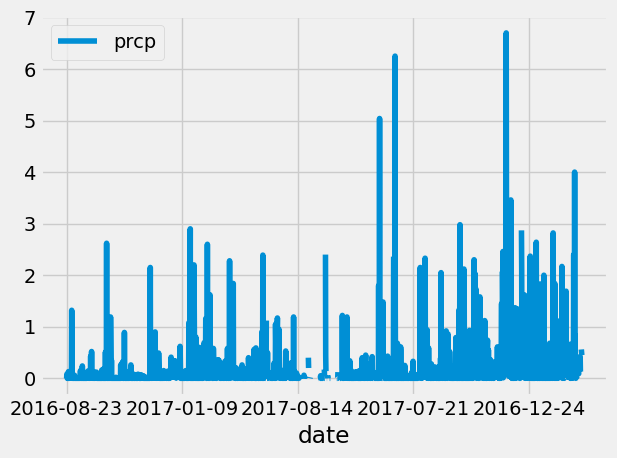

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 


import datetime as dt
import pandas as pd

session.query(func.max(Hawaii_measurements.date)).all()


query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
# Total dates 10.3.act2 InsDates
#session.query(func.count(Dow.date)).all().....below is from dowdates-10.3.actv3
sel = [Hawaii_measurements.date, 
       Hawaii_measurements.prcp]
prcp_scores = session.query(*sel).\
    filter(Hawaii_measurements.date >= query_date).all()

#prcp_scores 




# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prcp_scores, columns=['date', 'prcp'])


# Sort the dataframe by date
df.sort_values('date')


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x = 'date', y = 'prcp')
plt.tight_layout()
plt.show()


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe() 

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
    #total_stations = session.query(Hawaii_stations).distinct().count() = 9
    #total_stations = session.query(Hawaii_stations).count() = 19550
    #session.query(func.count(Hawaii_measurements.date)).all() = 19550
    #total_stations = session.query(Hawaii_measurements.station, Hawaii_stations.station).count()
        #print(total_stations)
        #175950

total_stations = session.query(func.sum(Hawaii_measurements.station, Hawaii_stations.station))
print(total_stations)

SELECT sum(measurement.station, station.station) AS sum_1 
FROM measurement, station


In [17]:
# Design a query to calculate the total number of stations in the dataset
total_stations2 = session.query(Hawaii_stations.station).distinct().count()
print(total_stations2)

9


In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

    #most_active = session.query(func.max(Hawaii_measurements.station)).first()
    #most_active
    #pet = session.query(Pet).filter_by(name="Marshmallow").first()
    #pet.age += 1

#session.query(func.max(Hawaii_stations.station)).all()
#most_active = session.query(func.max(Hawaii_measurements.station)).all()
#most_active

most_active = session\
    .query(Hawaii_measurements.station, func.count(Hawaii_measurements.station))\
    .group_by(Hawaii_measurements.station)\
    .order_by(func.count(Hawaii_measurements.station).desc())\
    .all()

# Select hm.station, count(hm.station)
# From hm
# Group by hm.station
# Order by count(hm.station) DESC

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
ma_station = "USC00519281" 

sel2 = [Hawaii_measurements.station, 
       func.min(Hawaii_measurements.tobs), 
       func.avg(Hawaii_measurements.tobs), 
       func.max(Hawaii_measurements.tobs)]

mas_temp = session.query(*sel2).\
    filter(Hawaii_measurements.station == ma_station).all()
mas_temp

[('USC00519281', 54.0, 71.66378066378067, 85.0)]

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_temp = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Temperature", query_temp)

Temperature 2016-08-23


0      77.0
1      77.0
2      80.0
3      80.0
4      75.0
       ... 
347    77.0
348    77.0
349    76.0
350    76.0
351    79.0
Name: tobs, Length: 352, dtype: float64

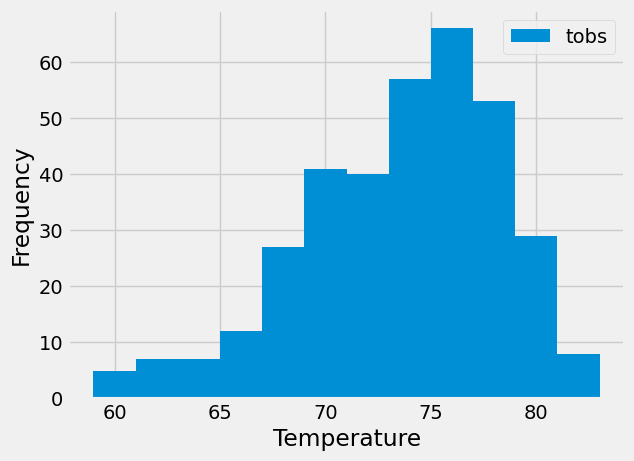

In [23]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
temp_histo = session.query(Hawaii_measurements.tobs).\
    filter(Hawaii_measurements.station == ma_station).\
    filter(Hawaii_measurements.date >= query_temp).all()

temp_histo

df = pd.DataFrame(temp_histo, columns=['tobs'])
df.plot.hist(bins=12)
plt.xlabel('Temperature')
df["tobs"]

# Close Session

In [16]:
# Close Session
session.close()